In [1]:
# config all inputs
input_file = "raw/Natural Gas - Reduced.csv";
key="Total Domestic Production"
output_file = "output/forecasted_gas_demand_prophet.csv";
train_date_to = '2023-12-31'
test_date_from = '2024-01-01';

13:24:35 - cmdstanpy - INFO - Chain [1] start processing
13:24:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\chavalit\nook-env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


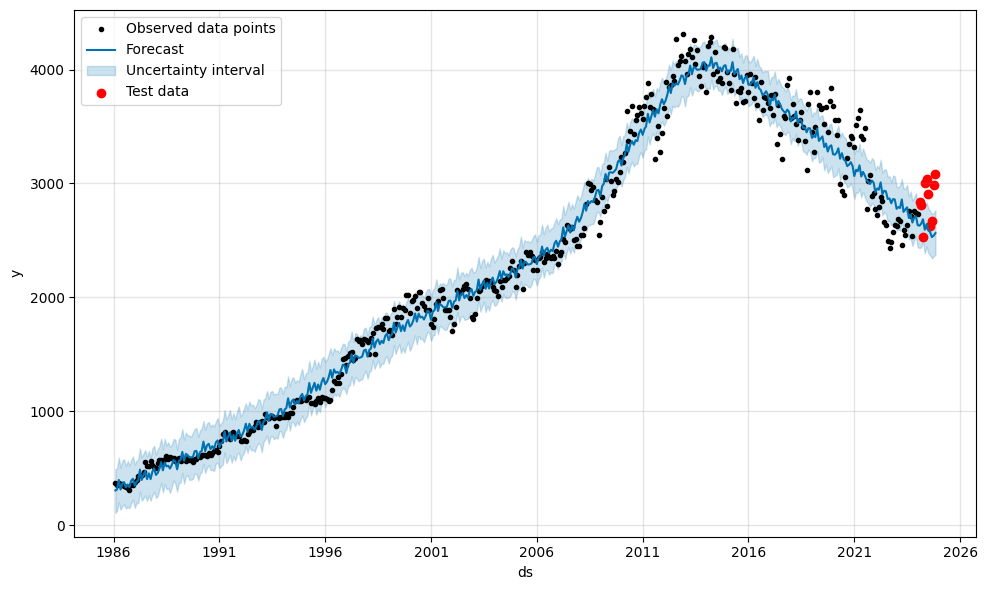

In [24]:
# version 1

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# โหลดข้อมูล (ควรเปลี่ยนเส้นทางไฟล์ให้ถูกต้อง)
data = pd.read_csv(input_file, parse_dates=['Date'])

# เปลี่ยนชื่อคอลัมน์ให้ตรงตามที่ Prophet ต้องการ
data.rename(columns={'Date': 'ds', key: 'y'}, inplace=True)
data['ds'] = data['ds'] + pd.offsets.MonthEnd(0) 

# แยกข้อมูลออกเป็น train และ test sets
train = data[data['ds'] <= train_date_to]
test = data[data['ds'] > test_date_from]

# สร้างโมเดล Prophet
model = Prophet()
model.fit(train)

# ทำการพยากรณ์ค่าในอนาคต
future = model.make_future_dataframe(periods=len(test), freq="M")
forecast = model.predict(future)

# วาดกราฟเปรียบเทียบ
fig = model.plot(forecast)
plt.scatter(test['ds'], test['y'], color='red', label='Test data')
plt.legend()
plt.show()



13:17:03 - cmdstanpy - INFO - Chain [1] start processing
13:17:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\chavalit\nook-env\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


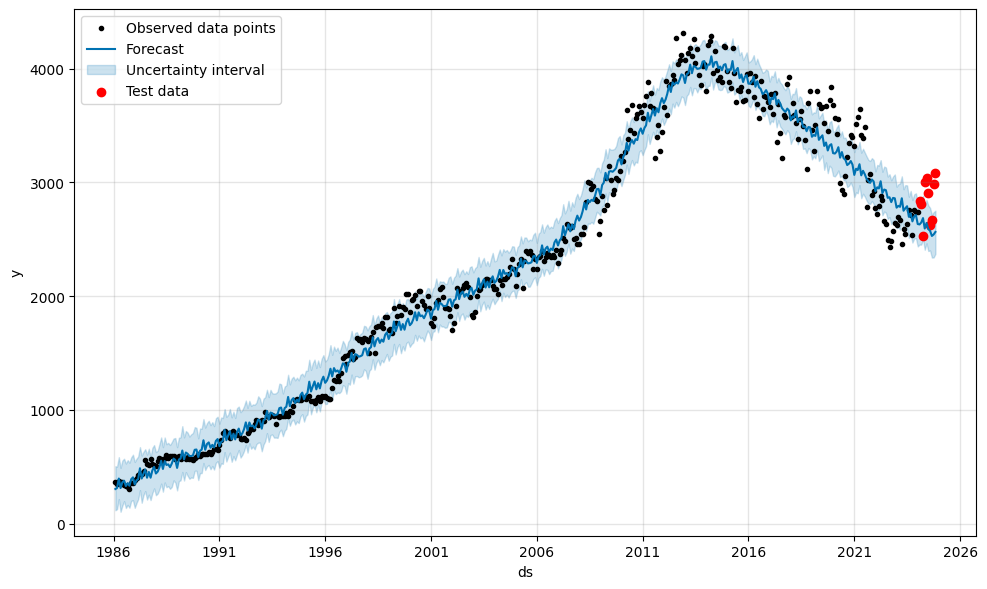

In [20]:
# version 2

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# โหลดข้อมูล (ควรเปลี่ยนเส้นทางไฟล์ให้ถูกต้อง)
data = pd.read_csv(input_file, parse_dates=['Date'])

# เปลี่ยนชื่อคอลัมน์ให้ตรงตามที่ Prophet ต้องการ
data.rename(columns={'Date': 'ds', key: 'y'}, inplace=True)
data['ds'] = data['ds'] + pd.offsets.MonthEnd(0) 

# แยกข้อมูลออกเป็น train และ test sets
train = data[data['ds'] <= train_date_to]
test = data[data['ds'] > test_date_from]

# สร้างโมเดล Prophet
model = Prophet(
    yearly_seasonality=True,   # ใช้ฤดูกาลรายปี
    weekly_seasonality=False,  # ปิดฤดูกาลรายสัปดาห์ (ไม่เกี่ยวกับข้อมูลรายเดือน)
    daily_seasonality=False    # ปิดฤดูกาลรายวัน
)
model.add_seasonality(name='yearly', period=12, fourier_order=5)
model.fit(train)

# ทำการพยากรณ์ค่าในอนาคต
future = model.make_future_dataframe(periods=len(test), freq="M")
forecast = model.predict(future)

# วาดกราฟเปรียบเทียบ
fig = model.plot(forecast)
plt.scatter(test['ds'], test['y'], color='red', label='Test data')
plt.legend()
plt.show()

In [25]:
new_forecast = forecast[forecast['ds'] > test_date_from]
new_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
456,2024-01-31,2653.260034,2433.635534,2811.451655,2653.260034,2653.260034,-23.523801,-23.523801,-23.523801,-23.523801,-23.523801,-23.523801,0.0,0.0,0.0,2629.736233
457,2024-02-29,2640.890885,2439.421651,2852.929536,2640.890885,2640.890885,5.486636,5.486636,5.486636,5.486636,5.486636,5.486636,0.0,0.0,0.0,2646.377521
458,2024-03-31,2627.668692,2490.792712,2874.347146,2627.668692,2627.668692,57.764476,57.764476,57.764476,57.764476,57.764476,57.764476,0.0,0.0,0.0,2685.433168
459,2024-04-30,2614.873021,2384.739386,2798.318155,2614.873021,2614.873021,-21.218757,-21.218757,-21.218757,-21.218757,-21.218757,-21.218757,0.0,0.0,0.0,2593.654264
460,2024-05-31,2601.650828,2447.785850,2833.002148,2601.348743,2602.278005,41.146758,41.146758,41.146758,41.146758,41.146758,41.146758,0.0,0.0,0.0,2642.797586
461,2024-06-30,2588.855157,2389.640122,2785.877084,2587.435890,2590.563119,-0.238373,-0.238373,-0.238373,-0.238373,-0.238373,-0.238373,0.0,0.0,0.0,2588.616784
462,2024-07-31,2575.632963,2369.580851,2758.255115,2572.786054,2578.554984,-1.669003,-1.669003,-1.669003,-1.669003,-1.669003,-1.669003,0.0,0.0,0.0,2573.963961
463,2024-08-31,2562.410770,2341.823469,2733.630044,2558.115728,2567.186283,-33.840177,-33.840177,-33.840177,-33.840177,-33.840177,-33.840177,0.0,0.0,0.0,2528.570593
464,2024-09-30,2549.615099,2359.532228,2739.335370,2543.613634,2556.157042,-8.790800,-8.790800,-8.790800,-8.790800,-8.790800,-8.790800,0.0,0.0,0.0,2540.824299
465,2024-10-31,2536.392906,2372.349165,2766.684585,2527.886219,2545.029627,27.457214,27.457214,27.457214,27.457214,27.457214,27.457214,0.0,0.0,0.0,2563.850120


In [28]:
# สร้าง DataFrame สำหรับผลการพยากรณ์
# forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# forecast_df = forecast_df[forecast_df['ds'].isin(test['ds'])]
forecast_df = pd.DataFrame({
    'date': test["ds"],
    'actual': test["y"],
    'forecast': new_forecast["yhat"].values.astype(int),
    'trend': new_forecast["trend"].values.astype(int)
})


# ตั้งค่า index ของ DataFrame เป็น date
forecast_df.set_index('date', inplace=True)

# ส่งออกผลลัพธ์ไปยังไฟล์ .csv
forecast_df.to_csv(output_file)

In [6]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [7]:
model.params.keys()

odict_keys(['lp__', 'k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])

In [13]:
test

,ds,y,Total Import,Grand Total
456,2024-01-31,2834,0,0
457,2024-02-29,2812,0,0
458,2024-03-31,2528,0,0
459,2024-04-30,3003,0,0
460,2024-05-31,3040,0,0
461,2024-06-30,2910,0,0
462,2024-07-31,2622,0,0
463,2024-08-31,2671,0,0
464,2024-09-30,2986,0,0
465,2024-10-31,3085,0,0
